In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
import seaborn as sns
from PIL import Image
import pandas as pd
import tensorflow as tf

import keras

import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops

from tensorflow.keras.preprocessing import image_dataset_from_directory

2023-11-21 10:44:55.381888: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
X_train = np.load('X_train.npy')
Y_train = np.load('Y_train.npy')
X_valid = np.load('X_valid.npy')
Y_valid = np.load('Y_valid.npy')
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_valid shape: " + str(X_valid.shape))
print ("Y_valid shape: " + str(Y_valid.shape))

X_train shape: (2134, 600)
Y_train shape: (2134, 6)
X_valid shape: (1424, 600)
Y_valid shape: (1424, 6)


In [4]:
def DNN1_model(hidden_layer, r):
    """
    Implements the forward propagation for the model:
    600 -> 30 -> 6
    
    Arguments:
    input_sig -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    
    input_sig = tf.keras.Input(shape=600)
    
    ## 1st hidden layer: 30 units
    F1 = tfl.Dense(units = hidden_layer, 
                   kernel_regularizer=tf.keras.regularizers.L2(r),
                   activation = 'relu')(input_sig)
    
    ## 6 neurons in output layer." 
    outputs = tfl.Dense(units=6, 
                        kernel_regularizer=tf.keras.regularizers.L2(r),
                        activation='softmax')(F1)
    # YOUR CODE STARTS HERE
    
    # YOUR CODE ENDS HERE
    model = tf.keras.Model(inputs=input_sig, outputs=outputs)
    return model

In [9]:
R = [0.001, 0.0033, 0.01, 0.03, 0.1]
L = [6, 10, 30, 100, 300]
train_accuracy = [[], [], [], [], []]
val_accuracy = [[], [], [], [], []]
i = 0
for l in L:    
    for r in R:
        model = DNN1_model(l, r)
        model.compile(optimizer='adam',
                      loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])
        model.fit(X_train, Y_train, validation_data = (X_valid, Y_valid), epochs=40)
        train_accuracy[i].append(model.evaluate(X_train, Y_train)[1])
        val_accuracy[i].append(model.evaluate(X_valid, Y_valid)[1])
        
    i += 1

Epoch 1/40
67/67 [==============================] - 1s 4ms/step - loss: 1.7874 - accuracy: 0.1912 - val_loss: 1.7387 - val_accuracy: 0.3146
Epoch 2/40
67/67 [==============================] - 0s 2ms/step - loss: 1.6871 - accuracy: 0.3154 - val_loss: 1.6046 - val_accuracy: 0.3504
Epoch 3/40
67/67 [==============================] - 0s 2ms/step - loss: 1.5387 - accuracy: 0.4133 - val_loss: 1.5071 - val_accuracy: 0.4459
Epoch 4/40
67/67 [==============================] - 0s 2ms/step - loss: 1.4392 - accuracy: 0.4897 - val_loss: 1.4400 - val_accuracy: 0.4888
Epoch 5/40
67/67 [==============================] - 0s 2ms/step - loss: 1.3635 - accuracy: 0.5066 - val_loss: 1.3845 - val_accuracy: 0.4951
Epoch 6/40
67/67 [==============================] - 0s 2ms/step - loss: 1.3015 - accuracy: 0.5305 - val_loss: 1.3521 - val_accuracy: 0.5098
Epoch 7/40
67/67 [==============================] - 0s 2ms/step - loss: 1.2562 - accuracy: 0.5581 - val_loss: 1.3198 - val_accuracy: 0.5126
Epoch 8/40
67/67 [==

Epoch 18/40
67/67 [==============================] - 0s 2ms/step - loss: 1.1835 - accuracy: 0.6007 - val_loss: 1.2863 - val_accuracy: 0.5527
Epoch 19/40
67/67 [==============================] - 0s 2ms/step - loss: 1.1796 - accuracy: 0.6045 - val_loss: 1.2788 - val_accuracy: 0.5597
Epoch 20/40
67/67 [==============================] - 0s 2ms/step - loss: 1.1755 - accuracy: 0.6045 - val_loss: 1.2786 - val_accuracy: 0.5632
Epoch 21/40
67/67 [==============================] - 0s 2ms/step - loss: 1.1696 - accuracy: 0.6148 - val_loss: 1.2767 - val_accuracy: 0.5667
Epoch 22/40
67/67 [==============================] - 0s 2ms/step - loss: 1.1685 - accuracy: 0.6321 - val_loss: 1.2694 - val_accuracy: 0.5660
Epoch 23/40
67/67 [==============================] - 0s 2ms/step - loss: 1.1633 - accuracy: 0.6190 - val_loss: 1.2691 - val_accuracy: 0.5548
Epoch 24/40
67/67 [==============================] - 0s 2ms/step - loss: 1.1591 - accuracy: 0.6162 - val_loss: 1.2706 - val_accuracy: 0.5527
Epoch 25/40
6

Epoch 35/40
67/67 [==============================] - 0s 2ms/step - loss: 1.3600 - accuracy: 0.5881 - val_loss: 1.4294 - val_accuracy: 0.5365
Epoch 36/40
67/67 [==============================] - 0s 2ms/step - loss: 1.3628 - accuracy: 0.5769 - val_loss: 1.4335 - val_accuracy: 0.5316
Epoch 37/40
67/67 [==============================] - 0s 2ms/step - loss: 1.3607 - accuracy: 0.5815 - val_loss: 1.4291 - val_accuracy: 0.5330
Epoch 38/40
67/67 [==============================] - 0s 2ms/step - loss: 1.3583 - accuracy: 0.5815 - val_loss: 1.4297 - val_accuracy: 0.5330
Epoch 39/40
67/67 [==============================] - 0s 2ms/step - loss: 1.3597 - accuracy: 0.5825 - val_loss: 1.4341 - val_accuracy: 0.5337
Epoch 40/40
45/45 [==============================] - 0s 1ms/step - loss: 1.4245 - accuracy: 0.5323
Epoch 1/40
67/67 [==============================] - 1s 4ms/step - loss: 2.1796 - accuracy: 0.1715 - val_loss: 2.0295 - val_accuracy: 0.1889
Epoch 2/40
67/67 [==============================] - 0s 2

Epoch 11/40
67/67 [==============================] - 0s 2ms/step - loss: 1.8095 - accuracy: 0.2563 - val_loss: 1.8061 - val_accuracy: 0.2647
Epoch 12/40
67/67 [==============================] - 0s 2ms/step - loss: 1.8032 - accuracy: 0.2582 - val_loss: 1.8011 - val_accuracy: 0.2528
Epoch 13/40
67/67 [==============================] - 0s 2ms/step - loss: 1.7993 - accuracy: 0.2474 - val_loss: 1.7987 - val_accuracy: 0.2444
Epoch 14/40
67/67 [==============================] - 0s 2ms/step - loss: 1.7969 - accuracy: 0.2423 - val_loss: 1.7976 - val_accuracy: 0.2458
Epoch 15/40
67/67 [==============================] - 0s 2ms/step - loss: 1.7954 - accuracy: 0.2423 - val_loss: 1.7962 - val_accuracy: 0.2444
Epoch 16/40
67/67 [==============================] - 0s 2ms/step - loss: 1.7935 - accuracy: 0.2455 - val_loss: 1.7947 - val_accuracy: 0.2430
Epoch 17/40
67/67 [==============================] - 0s 2ms/step - loss: 1.7928 - accuracy: 0.2441 - val_loss: 1.7938 - val_accuracy: 0.2381
Epoch 18/40
6

Epoch 28/40
67/67 [==============================] - 0s 2ms/step - loss: 0.9642 - accuracy: 0.6804 - val_loss: 1.1529 - val_accuracy: 0.6018
Epoch 29/40
67/67 [==============================] - 0s 2ms/step - loss: 0.9569 - accuracy: 0.6874 - val_loss: 1.1555 - val_accuracy: 0.5885
Epoch 30/40
67/67 [==============================] - 0s 2ms/step - loss: 0.9555 - accuracy: 0.6893 - val_loss: 1.1457 - val_accuracy: 0.5976
Epoch 31/40
67/67 [==============================] - 0s 2ms/step - loss: 0.9540 - accuracy: 0.6809 - val_loss: 1.1513 - val_accuracy: 0.6039
Epoch 32/40
67/67 [==============================] - 0s 2ms/step - loss: 0.9446 - accuracy: 0.6978 - val_loss: 1.1715 - val_accuracy: 0.5920
Epoch 33/40
67/67 [==============================] - 0s 2ms/step - loss: 0.9433 - accuracy: 0.6945 - val_loss: 1.1555 - val_accuracy: 0.5948
Epoch 34/40
67/67 [==============================] - 0s 2ms/step - loss: 0.9408 - accuracy: 0.6917 - val_loss: 1.1496 - val_accuracy: 0.6004
Epoch 35/40
6

67/67 [==============================] - 0s 2ms/step - loss: 1.6118 - accuracy: 0.4948 - val_loss: 1.6065 - val_accuracy: 0.4803
Epoch 4/40
67/67 [==============================] - 0s 2ms/step - loss: 1.5375 - accuracy: 0.5398 - val_loss: 1.5685 - val_accuracy: 0.5014
Epoch 5/40
67/67 [==============================] - 0s 2ms/step - loss: 1.4930 - accuracy: 0.5581 - val_loss: 1.5436 - val_accuracy: 0.5162
Epoch 6/40
67/67 [==============================] - 0s 2ms/step - loss: 1.4638 - accuracy: 0.5642 - val_loss: 1.5109 - val_accuracy: 0.4944
Epoch 7/40
67/67 [==============================] - 0s 2ms/step - loss: 1.4459 - accuracy: 0.5548 - val_loss: 1.5011 - val_accuracy: 0.5344
Epoch 8/40
67/67 [==============================] - 0s 2ms/step - loss: 1.4304 - accuracy: 0.5656 - val_loss: 1.4916 - val_accuracy: 0.5232
Epoch 9/40
67/67 [==============================] - 0s 2ms/step - loss: 1.4179 - accuracy: 0.5764 - val_loss: 1.4925 - val_accuracy: 0.4993
Epoch 10/40
67/67 [============

67/67 [==============================] - 0s 2ms/step - loss: 1.6288 - accuracy: 0.4995 - val_loss: 1.6561 - val_accuracy: 0.4733
Epoch 21/40
67/67 [==============================] - 0s 2ms/step - loss: 1.6285 - accuracy: 0.4995 - val_loss: 1.6609 - val_accuracy: 0.4705
Epoch 22/40
67/67 [==============================] - 0s 2ms/step - loss: 1.6277 - accuracy: 0.5000 - val_loss: 1.6531 - val_accuracy: 0.4782
Epoch 23/40
67/67 [==============================] - 0s 2ms/step - loss: 1.6269 - accuracy: 0.5112 - val_loss: 1.6529 - val_accuracy: 0.4733
Epoch 24/40
67/67 [==============================] - 0s 2ms/step - loss: 1.6304 - accuracy: 0.4906 - val_loss: 1.6506 - val_accuracy: 0.4656
Epoch 25/40
67/67 [==============================] - 0s 2ms/step - loss: 1.6280 - accuracy: 0.4995 - val_loss: 1.6493 - val_accuracy: 0.4782
Epoch 26/40
67/67 [==============================] - 0s 2ms/step - loss: 1.6257 - accuracy: 0.5066 - val_loss: 1.6522 - val_accuracy: 0.4705
Epoch 27/40
67/67 [======

Epoch 37/40
67/67 [==============================] - 0s 2ms/step - loss: 1.7907 - accuracy: 0.2905 - val_loss: 1.7931 - val_accuracy: 0.2760
Epoch 38/40
67/67 [==============================] - 0s 2ms/step - loss: 1.7911 - accuracy: 0.2948 - val_loss: 1.7926 - val_accuracy: 0.2851
Epoch 39/40
67/67 [==============================] - 0s 2ms/step - loss: 1.7909 - accuracy: 0.2952 - val_loss: 1.7930 - val_accuracy: 0.2942
Epoch 40/40
45/45 [==============================] - 0s 1ms/step - loss: 1.7928 - accuracy: 0.2795
Epoch 1/40
67/67 [==============================] - 1s 4ms/step - loss: 1.6654 - accuracy: 0.3833 - val_loss: 1.5372 - val_accuracy: 0.4473
Epoch 2/40
67/67 [==============================] - 0s 2ms/step - loss: 1.4018 - accuracy: 0.5234 - val_loss: 1.4176 - val_accuracy: 0.5063
Epoch 3/40
67/67 [==============================] - 0s 2ms/step - loss: 1.2847 - accuracy: 0.5694 - val_loss: 1.3340 - val_accuracy: 0.5471
Epoch 4/40
67/67 [==============================] - 0s 2ms

Epoch 13/40
67/67 [==============================] - 0s 2ms/step - loss: 1.1484 - accuracy: 0.6453 - val_loss: 1.2750 - val_accuracy: 0.5801
Epoch 14/40
67/67 [==============================] - 0s 2ms/step - loss: 1.1426 - accuracy: 0.6481 - val_loss: 1.3151 - val_accuracy: 0.5611
Epoch 15/40
67/67 [==============================] - 0s 2ms/step - loss: 1.1400 - accuracy: 0.6467 - val_loss: 1.3016 - val_accuracy: 0.5548
Epoch 16/40
67/67 [==============================] - 0s 2ms/step - loss: 1.1324 - accuracy: 0.6420 - val_loss: 1.2611 - val_accuracy: 0.5836
Epoch 17/40
67/67 [==============================] - 0s 2ms/step - loss: 1.1281 - accuracy: 0.6556 - val_loss: 1.2665 - val_accuracy: 0.5871
Epoch 18/40
67/67 [==============================] - 0s 2ms/step - loss: 1.1250 - accuracy: 0.6617 - val_loss: 1.2693 - val_accuracy: 0.5765
Epoch 19/40
67/67 [==============================] - 0s 2ms/step - loss: 1.1180 - accuracy: 0.6556 - val_loss: 1.2736 - val_accuracy: 0.5794
Epoch 20/40
6

Epoch 30/40
67/67 [==============================] - 0s 2ms/step - loss: 1.3568 - accuracy: 0.5867 - val_loss: 1.4279 - val_accuracy: 0.5344
Epoch 31/40
67/67 [==============================] - 0s 2ms/step - loss: 1.3580 - accuracy: 0.5834 - val_loss: 1.4329 - val_accuracy: 0.5365
Epoch 32/40
67/67 [==============================] - 0s 2ms/step - loss: 1.3565 - accuracy: 0.5918 - val_loss: 1.4285 - val_accuracy: 0.5316
Epoch 33/40
67/67 [==============================] - 0s 2ms/step - loss: 1.3593 - accuracy: 0.5961 - val_loss: 1.4382 - val_accuracy: 0.5344
Epoch 34/40
67/67 [==============================] - 0s 2ms/step - loss: 1.3607 - accuracy: 0.5867 - val_loss: 1.4449 - val_accuracy: 0.5386
Epoch 35/40
67/67 [==============================] - 0s 2ms/step - loss: 1.3574 - accuracy: 0.5895 - val_loss: 1.4350 - val_accuracy: 0.5527
Epoch 36/40
67/67 [==============================] - 0s 2ms/step - loss: 1.3557 - accuracy: 0.5933 - val_loss: 1.4351 - val_accuracy: 0.5478
Epoch 37/40
6

Epoch 6/40
67/67 [==============================] - 0s 2ms/step - loss: 1.8328 - accuracy: 0.3674 - val_loss: 1.8247 - val_accuracy: 0.3631
Epoch 7/40
67/67 [==============================] - 0s 2ms/step - loss: 1.8135 - accuracy: 0.3346 - val_loss: 1.8098 - val_accuracy: 0.3617
Epoch 8/40
67/67 [==============================] - 0s 2ms/step - loss: 1.8027 - accuracy: 0.3674 - val_loss: 1.8017 - val_accuracy: 0.2985
Epoch 9/40
67/67 [==============================] - 0s 2ms/step - loss: 1.7976 - accuracy: 0.3304 - val_loss: 1.7974 - val_accuracy: 0.2725
Epoch 10/40
67/67 [==============================] - 0s 2ms/step - loss: 1.7945 - accuracy: 0.3201 - val_loss: 1.7950 - val_accuracy: 0.2978
Epoch 11/40
67/67 [==============================] - 0s 2ms/step - loss: 1.7930 - accuracy: 0.2990 - val_loss: 1.7936 - val_accuracy: 0.2760
Epoch 12/40
67/67 [==============================] - 0s 2ms/step - loss: 1.7921 - accuracy: 0.3018 - val_loss: 1.7929 - val_accuracy: 0.2985
Epoch 13/40
67/67

Epoch 23/40
67/67 [==============================] - 0s 2ms/step - loss: 0.8765 - accuracy: 0.7455 - val_loss: 1.1715 - val_accuracy: 0.6124
Epoch 24/40
67/67 [==============================] - 0s 2ms/step - loss: 0.8870 - accuracy: 0.7259 - val_loss: 1.1665 - val_accuracy: 0.6201
Epoch 25/40
67/67 [==============================] - 0s 2ms/step - loss: 0.8754 - accuracy: 0.7437 - val_loss: 1.1784 - val_accuracy: 0.6159
Epoch 26/40
67/67 [==============================] - 0s 2ms/step - loss: 0.8723 - accuracy: 0.7512 - val_loss: 1.1766 - val_accuracy: 0.6264
Epoch 27/40
67/67 [==============================] - 0s 2ms/step - loss: 0.8590 - accuracy: 0.7521 - val_loss: 1.1707 - val_accuracy: 0.6278
Epoch 28/40
67/67 [==============================] - 0s 2ms/step - loss: 0.8547 - accuracy: 0.7573 - val_loss: 1.1891 - val_accuracy: 0.6152
Epoch 29/40
67/67 [==============================] - 0s 2ms/step - loss: 0.8520 - accuracy: 0.7601 - val_loss: 1.1802 - val_accuracy: 0.6271
Epoch 30/40
6

Epoch 40/40
45/45 [==============================] - 0s 1ms/step - loss: 1.3121 - accuracy: 0.5695
Epoch 1/40
67/67 [==============================] - 1s 4ms/step - loss: 2.6182 - accuracy: 0.3927 - val_loss: 1.9884 - val_accuracy: 0.4642
Epoch 2/40
67/67 [==============================] - 0s 2ms/step - loss: 1.7419 - accuracy: 0.5117 - val_loss: 1.6444 - val_accuracy: 0.4754
Epoch 3/40
67/67 [==============================] - 0s 2ms/step - loss: 1.5363 - accuracy: 0.5581 - val_loss: 1.5538 - val_accuracy: 0.5021
Epoch 4/40
67/67 [==============================] - 0s 2ms/step - loss: 1.4662 - accuracy: 0.5478 - val_loss: 1.5001 - val_accuracy: 0.5176
Epoch 5/40
67/67 [==============================] - 0s 2ms/step - loss: 1.4366 - accuracy: 0.5483 - val_loss: 1.4921 - val_accuracy: 0.5239
Epoch 6/40
67/67 [==============================] - 0s 2ms/step - loss: 1.4183 - accuracy: 0.5792 - val_loss: 1.4674 - val_accuracy: 0.5520
Epoch 7/40
67/67 [==============================] - 0s 2ms/st

Epoch 16/40
67/67 [==============================] - 0s 3ms/step - loss: 1.6342 - accuracy: 0.4789 - val_loss: 1.6555 - val_accuracy: 0.4551
Epoch 17/40
67/67 [==============================] - 0s 3ms/step - loss: 1.6368 - accuracy: 0.4869 - val_loss: 1.6769 - val_accuracy: 0.4410
Epoch 18/40
67/67 [==============================] - 0s 3ms/step - loss: 1.6335 - accuracy: 0.4747 - val_loss: 1.6551 - val_accuracy: 0.4789
Epoch 19/40
67/67 [==============================] - 0s 3ms/step - loss: 1.6325 - accuracy: 0.4939 - val_loss: 1.6591 - val_accuracy: 0.4789
Epoch 20/40
67/67 [==============================] - 0s 3ms/step - loss: 1.6290 - accuracy: 0.4756 - val_loss: 1.6531 - val_accuracy: 0.4593
Epoch 21/40
67/67 [==============================] - 0s 3ms/step - loss: 1.6340 - accuracy: 0.4672 - val_loss: 1.6520 - val_accuracy: 0.4824
Epoch 22/40
67/67 [==============================] - 0s 2ms/step - loss: 1.6354 - accuracy: 0.4747 - val_loss: 1.6628 - val_accuracy: 0.4558
Epoch 23/40
6

Epoch 33/40
67/67 [==============================] - 0s 2ms/step - loss: 1.7922 - accuracy: 0.2596 - val_loss: 1.7933 - val_accuracy: 0.2563
Epoch 34/40
67/67 [==============================] - 0s 2ms/step - loss: 1.7917 - accuracy: 0.2427 - val_loss: 1.7935 - val_accuracy: 0.2388
Epoch 35/40
67/67 [==============================] - 0s 2ms/step - loss: 1.7921 - accuracy: 0.2507 - val_loss: 1.7934 - val_accuracy: 0.2472
Epoch 36/40
67/67 [==============================] - 0s 2ms/step - loss: 1.7920 - accuracy: 0.2666 - val_loss: 1.7933 - val_accuracy: 0.2619
Epoch 37/40
67/67 [==============================] - 0s 2ms/step - loss: 1.7913 - accuracy: 0.2390 - val_loss: 1.7937 - val_accuracy: 0.2507
Epoch 38/40
67/67 [==============================] - 0s 2ms/step - loss: 1.7918 - accuracy: 0.2671 - val_loss: 1.7953 - val_accuracy: 0.2465
Epoch 39/40
67/67 [==============================] - 0s 3ms/step - loss: 1.7920 - accuracy: 0.2493 - val_loss: 1.7936 - val_accuracy: 0.2662
Epoch 40/40
4

Epoch 9/40
67/67 [==============================] - 0s 5ms/step - loss: 1.1812 - accuracy: 0.6223 - val_loss: 1.3066 - val_accuracy: 0.5688
Epoch 10/40
67/67 [==============================] - 0s 4ms/step - loss: 1.1633 - accuracy: 0.6350 - val_loss: 1.2980 - val_accuracy: 0.5688
Epoch 11/40
67/67 [==============================] - 0s 5ms/step - loss: 1.1795 - accuracy: 0.6261 - val_loss: 1.3127 - val_accuracy: 0.5681
Epoch 12/40
67/67 [==============================] - 0s 6ms/step - loss: 1.1527 - accuracy: 0.6354 - val_loss: 1.3228 - val_accuracy: 0.5456
Epoch 13/40
67/67 [==============================] - 0s 7ms/step - loss: 1.1631 - accuracy: 0.6331 - val_loss: 1.3154 - val_accuracy: 0.5583
Epoch 14/40
67/67 [==============================] - 0s 6ms/step - loss: 1.1532 - accuracy: 0.6228 - val_loss: 1.2747 - val_accuracy: 0.5772
Epoch 15/40
67/67 [==============================] - 0s 5ms/step - loss: 1.1505 - accuracy: 0.6443 - val_loss: 1.3047 - val_accuracy: 0.5822
Epoch 16/40
67

Epoch 26/40
67/67 [==============================] - 0s 4ms/step - loss: 1.3914 - accuracy: 0.5703 - val_loss: 1.4294 - val_accuracy: 0.5253
Epoch 27/40
67/67 [==============================] - 0s 4ms/step - loss: 1.3865 - accuracy: 0.5665 - val_loss: 1.4633 - val_accuracy: 0.5197
Epoch 28/40
67/67 [==============================] - 0s 4ms/step - loss: 1.3812 - accuracy: 0.5670 - val_loss: 1.4426 - val_accuracy: 0.5133
Epoch 29/40
67/67 [==============================] - 0s 4ms/step - loss: 1.3794 - accuracy: 0.5628 - val_loss: 1.4330 - val_accuracy: 0.5414
Epoch 30/40
67/67 [==============================] - 0s 4ms/step - loss: 1.3769 - accuracy: 0.5792 - val_loss: 1.4539 - val_accuracy: 0.5471
Epoch 31/40
67/67 [==============================] - 0s 4ms/step - loss: 1.3710 - accuracy: 0.5689 - val_loss: 1.4230 - val_accuracy: 0.5281
Epoch 32/40
67/67 [==============================] - 0s 4ms/step - loss: 1.3810 - accuracy: 0.5614 - val_loss: 1.4459 - val_accuracy: 0.5190
Epoch 33/40
6

Epoch 2/40
67/67 [==============================] - 0s 4ms/step - loss: 2.2803 - accuracy: 0.3683 - val_loss: 1.8472 - val_accuracy: 0.3111
Epoch 3/40
67/67 [==============================] - 0s 4ms/step - loss: 1.8157 - accuracy: 0.3519 - val_loss: 1.7993 - val_accuracy: 0.2802
Epoch 4/40
67/67 [==============================] - 0s 4ms/step - loss: 1.7965 - accuracy: 0.2858 - val_loss: 1.7964 - val_accuracy: 0.3041
Epoch 5/40
67/67 [==============================] - 0s 4ms/step - loss: 1.7929 - accuracy: 0.2765 - val_loss: 1.7929 - val_accuracy: 0.2633
Epoch 6/40
67/67 [==============================] - 0s 4ms/step - loss: 1.7923 - accuracy: 0.2863 - val_loss: 1.7926 - val_accuracy: 0.2690
Epoch 7/40
67/67 [==============================] - 0s 4ms/step - loss: 1.7925 - accuracy: 0.2582 - val_loss: 1.7924 - val_accuracy: 0.2851
Epoch 8/40
67/67 [==============================] - 0s 4ms/step - loss: 1.7923 - accuracy: 0.2619 - val_loss: 1.7917 - val_accuracy: 0.2809
Epoch 9/40
67/67 [==

In [10]:
print(train_accuracy)

[[0.6799437403678894, 0.6438612937927246, 0.5801312327384949, 0.4976569712162018, 0.2666354179382324], [0.724929690361023, 0.6701030731201172, 0.5965323448181152, 0.49906280636787415, 0.2914714217185974], [0.7666354179382324, 0.6958763003349304, 0.6021555662155151, 0.5023429989814758, 0.2811621427536011], [0.811621367931366, 0.6813495755195618, 0.595595121383667, 0.4882849156856537, 0.26710402965545654], [0.8270852565765381, 0.676194965839386, 0.586691677570343, 0.5, 0.27272728085517883]]


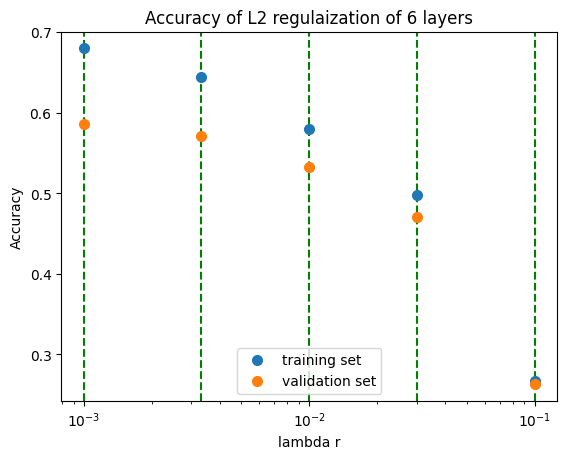

In [11]:
for r in R:
    plt.axvline(r, color="green", linestyle="--")
plt.plot(R, train_accuracy[0], '.', markersize=14, label = 'training set')
plt.plot(R, val_accuracy[0], '.', markersize=14, label = 'validation set')
plt.xlabel('lambda r')
plt.ylabel('Accuracy')
plt.title('Accuracy of L2 regulaization of ' + str(L[0]) + ' layers')
plt.semilogx()
plt.legend()
plt.show()

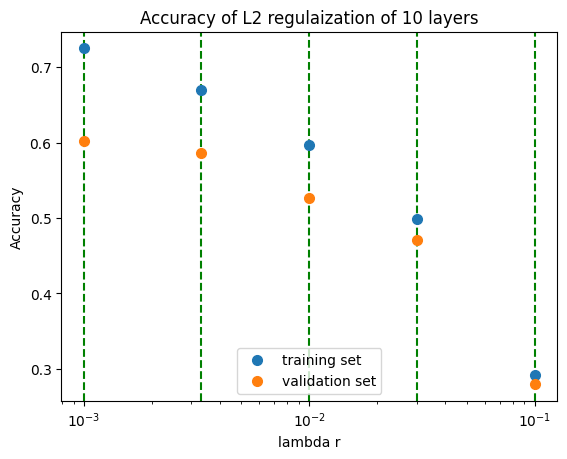

In [12]:
for r in R:
    plt.axvline(r, color="green", linestyle="--")
plt.plot(R, train_accuracy[1], '.', markersize=14, label = 'training set')
plt.plot(R, val_accuracy[1], '.', markersize=14, label = 'validation set')
plt.xlabel('lambda r')
plt.ylabel('Accuracy')
plt.title('Accuracy of L2 regulaization of ' + str(L[1]) + ' layers')
plt.semilogx()
plt.legend()
plt.show()

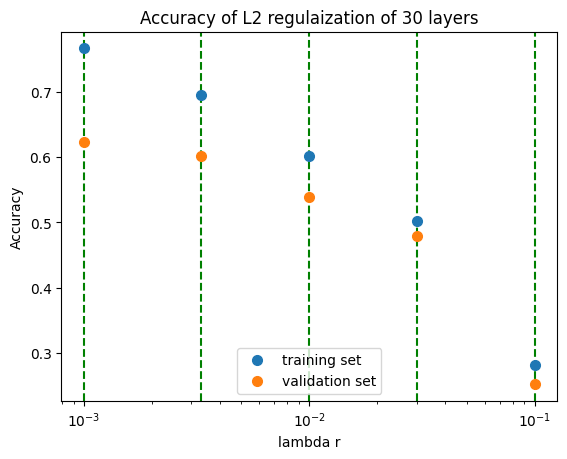

In [13]:
for r in R:
    plt.axvline(r, color="green", linestyle="--")
plt.plot(R, train_accuracy[2], '.', markersize=14, label = 'training set')
plt.plot(R, val_accuracy[2], '.', markersize=14, label = 'validation set')
plt.xlabel('lambda r')
plt.ylabel('Accuracy')
plt.title('Accuracy of L2 regulaization of ' + str(L[2]) + ' layers')
plt.semilogx()
plt.legend()
plt.show()

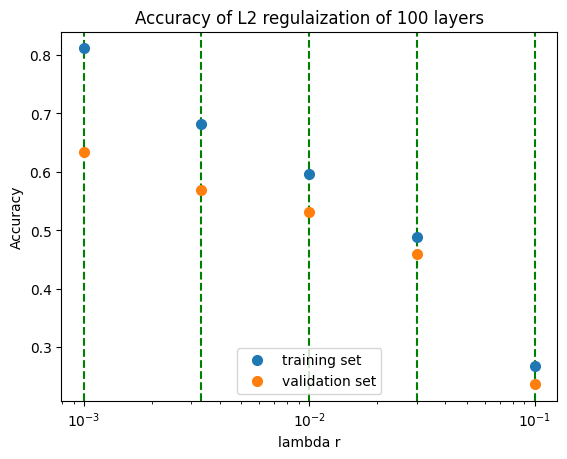

In [14]:
for r in R:
    plt.axvline(r, color="green", linestyle="--")
plt.plot(R, train_accuracy[3], '.', markersize=14, label = 'training set')
plt.plot(R, val_accuracy[3], '.', markersize=14, label = 'validation set')
plt.xlabel('lambda r')
plt.ylabel('Accuracy')
plt.title('Accuracy of L2 regulaization of ' + str(L[3]) + ' layers')
plt.semilogx()
plt.legend()
plt.show()

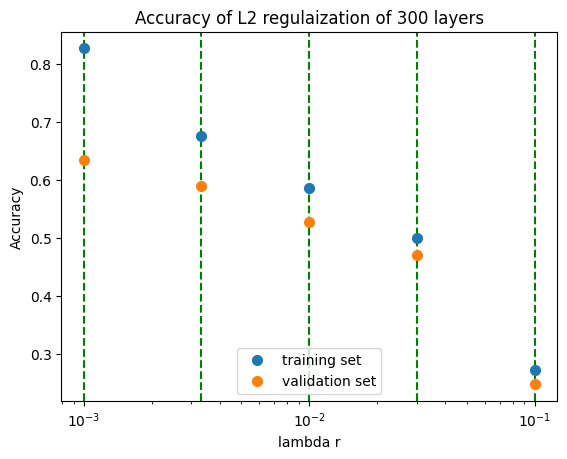

In [15]:
for r in R:
    plt.axvline(r, color="green", linestyle="--")
plt.plot(R, train_accuracy[4], '.', markersize=14, label = 'training set')
plt.plot(R, val_accuracy[4], '.', markersize=14, label = 'validation set')
plt.xlabel('lambda r')
plt.ylabel('Accuracy')
plt.title('Accuracy of L2 regulaization of ' + str(L[4]) + ' layers')
plt.semilogx()
plt.legend()
plt.show()

In [11]:
%%time 
history = model.fit(X_train, Y_train, validation_data = (X_valid, Y_valid), epochs=50)

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


67/67 [==============================] - 1s 5ms/step - loss: 2.5793 - accuracy: 0.4072 - val_loss: 1.9535 - val_accuracy: 0.4277
Epoch 2/50
67/67 [==============================] - 0s 3ms/step - loss: 1.7131 - accuracy: 0.5248 - val_loss: 1.6417 - val_accuracy: 0.4902
Epoch 3/50
67/67 [==============================] - 0s 3ms/step - loss: 1.5284 - accuracy: 0.5520 - val_loss: 1.5419 - val_accuracy: 0.5105
Epoch 4/50
67/67 [==============================] - 0s 3ms/step - loss: 1.4602 - accuracy: 0.5539 - val_loss: 1.5178 - val_accuracy: 0.5197
Epoch 5/50
67/67 [==============================] - 0s 3ms/step - loss: 1.4251 - accuracy: 0.5679 - val_loss: 1.4730 - val_accuracy: 0.5309
Epoch 6/50
67/67 [==============================] - 0s 2ms/step - loss: 1.4108 - accuracy: 0.5623 - val_loss: 1.5028 - val_accuracy: 0.5077
Epoch 7/50
67/67 [==============================] - 0s 3ms/step - loss: 1.4032 - accuracy: 0.5614 - val_loss: 1.4586 - val_accuracy: 0.5218
Epoch 8/50
67/67 [=============

/var/folders/by/qp26tbnd50dg2yrr86m09rzm0000gn/T/ipykernel_5225/1602424045.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
/var/folders/by/qp26tbnd50dg2yrr86m09rzm0000gn/T/ipykernel_5225/1602424045.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

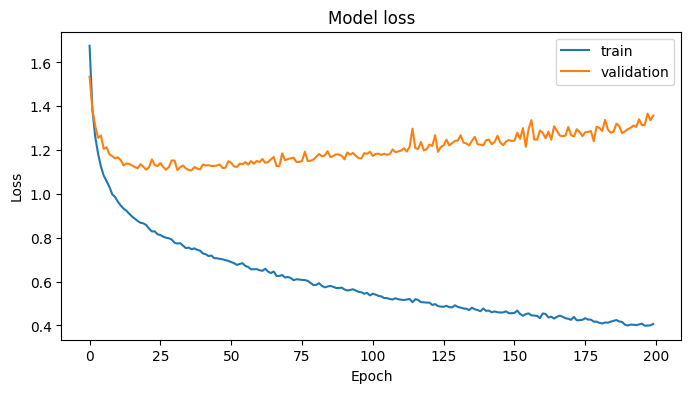

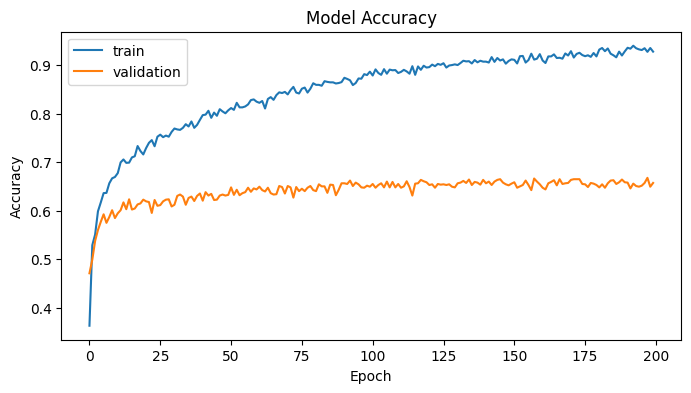

In [105]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(8,4)).set(xlabel='Epoch',ylabel='Loss')
plt.savefig('1000_Loss')
df_acc.plot(title='Model Accuracy',figsize=(8,4)).set(xlabel='Epoch',ylabel='Accuracy')


45/45 [==============================] - 0s 1ms/step


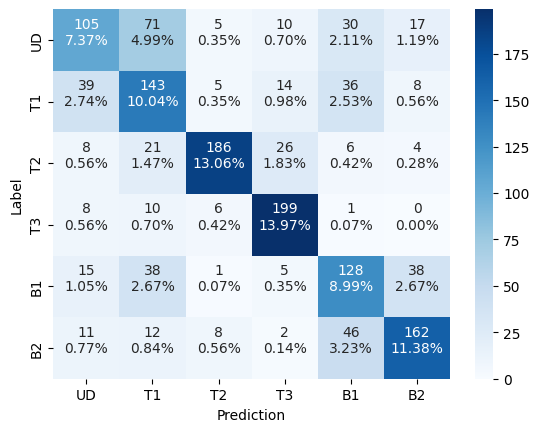

<Figure size 1000x800 with 0 Axes>

In [79]:
y_pred = model.predict(X_valid)       
# Convert OHE back to regular 
y_pred = tf.argmax(y_pred, axis=1)     
## True Labels
y_true = tf.argmax(Y_valid, axis=1) 

# Confusion Matrix
cf_matrix = np.array(tf.math.confusion_matrix(y_true, y_pred))

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(6,6)

ax = sns.heatmap(cf_matrix,
                 xticklabels=["UD", "T1", "T2","T3","B1", "B2"],
                 yticklabels=["UD", "T1", "T2","T3","B1", "B2"],
                 annot=labels, fmt='', cmap='Blues')

plt.xlabel('Prediction')
plt.ylabel('Label')
plt.figure(figsize=(10, 8))
plt.savefig('1000_confusion')
